Import necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

Read data

In [7]:
data = pd.read_csv('Fe-Ti-W data_for PCA.txt', sep='\t', header=0)
header = ["Ti","Fe","W","Photoactivity","Ti Stability","Fe Stability","W Stability","mC/nmol"]

Scale and center data

In [9]:
scaled_data = preprocessing.scale(data)

Create a PCA object and perform PCA

In [10]:
pca =  PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

Calculate the percentage of variation for each principal component and create labels
Plot Scree plot

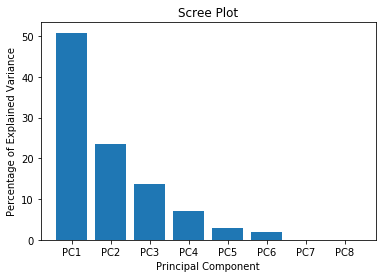

In [11]:
per_var=np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [12]:
per_var

array([50.8, 23.5, 13.6,  7.1,  3. ,  1.9,  0. ,  0. ])

Construct matrix with sample number as rows and PCs as columns.
Plot PCA score graph

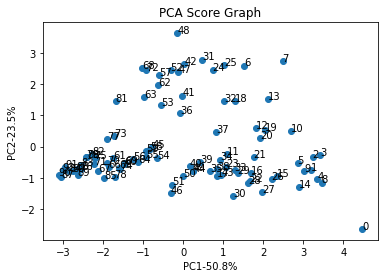

In [13]:
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Score Graph")
plt.xlabel("PC1-{0}%".format(per_var[0]))
plt.ylabel("PC2-{0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

Get loading score for PC1

In [14]:
loading_scores_1 = pd.Series(pca.components_[0], index=header)
loading_scores_1

Ti              -0.479658
Fe               0.318833
W                0.459419
Photoactivity    0.457488
Ti Stability    -0.000000
Fe Stability    -0.402609
W Stability     -0.103067
mC/nmol          0.274217
dtype: float64

Get loading score for PC2

In [16]:
loading_scores_2 = pd.Series(pca.components_[1], index=header)
loading_scores_2

Ti              -0.282055
Fe               0.480677
W               -0.161928
Photoactivity   -0.219118
Ti Stability    -0.000000
Fe Stability     0.188395
W Stability     -0.656521
mC/nmol         -0.385550
dtype: float64